<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/1124%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 04. 합성곱 신경망 (CNN)
01. 합성곱 신경망 CNN(Convolutional Neural Network):

* 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
* 컴퓨터 비전 분야에서 많이 사용
* 이미지 분류, 객체 탐지, 스타일 전이

<br/>

1-1. 이미지 표현

* 이미지(또는 영상)는 숫자로 표현
* 픽셀, 채널 이미지 사용

1-2. 합성곱 (Convolution)
* 합성곱 연산: 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 커널(kernel)을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법
 * 특성맵(feature map): 합성곱 연산을 통해 추출된 이미지

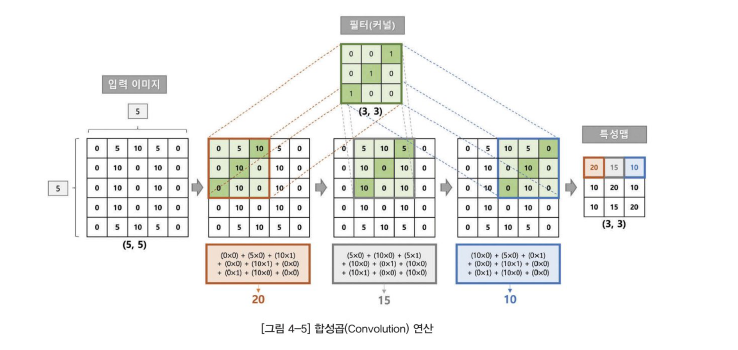

1-3. 채널 (Channel)
* 입력 이미지를 구성하는 2차원 배열의 개수
* 흑백은 채널 1개, 컬러 이미지는 채널 3개(R,G,B)
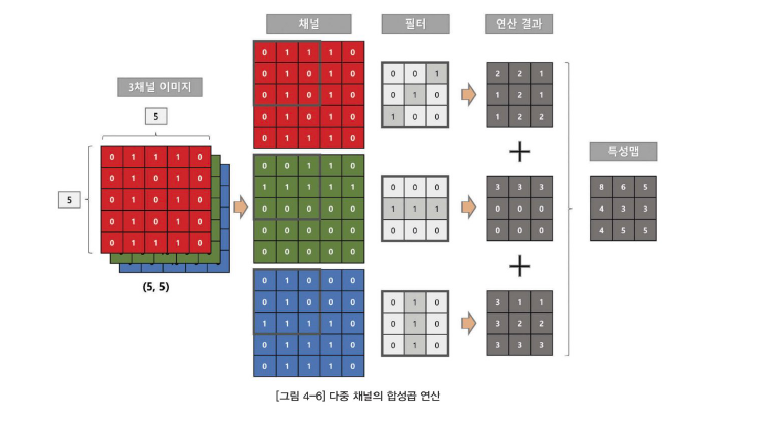

* 입력 이미지의 채널 개수만큼 합성곱 연산된 결과 생성됨, elementwise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성됨

(1개 커널의 사이즈) x (입력 채널 수) x (출력 필터 수) = (커널 수)


1-4. 스트라이드 (stride)
* 커널이 이동하는 간격. 주로 1 또는 2

n픽셀씩 우측으로 이동 -> 우측 끝까지 이동했다면 아래로 n칸, 좌측 첫 번째로 이동하여 추출


1-5. 패딩(padding)
* 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 패딩 설정 가능
* 일반적으로 zero-padding 사용
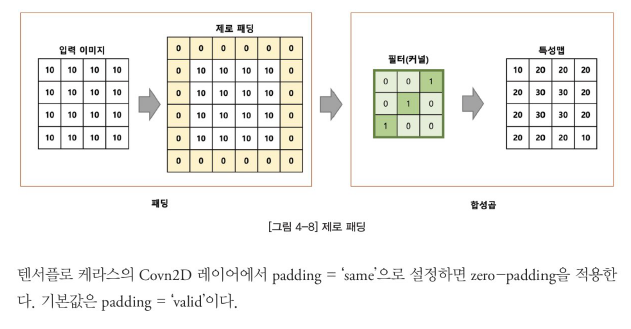


1-6. 특성맵 (feature map) 사이즈
* 패딩과 스트라이드를 적용하고 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식
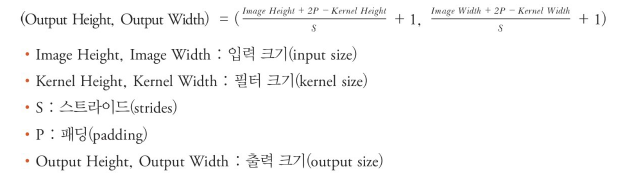

1-7. 풀링 (pooling)
* 풀링(pooling)레이어: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
  * 이미지 축소를 통해 연산량을 감소
  * 과대적합 방지
* 최대 풀링(max pooling): 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념, 생각보다 좋은 성능으로 합성곱 신경망과 주로 사용
* 평균 풀링(average pooling)
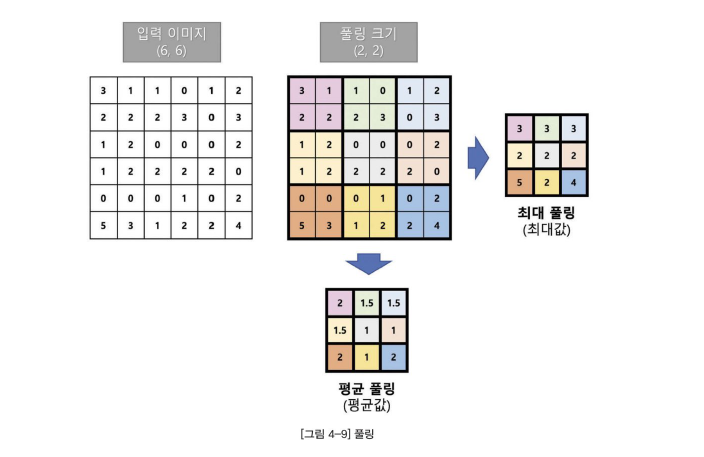



#02. 간단한 모델 생성
2-1. 데이터 로드 및 전처리

In [1]:
# tensorflow 모듈 import
import tensorflow as tf

In [2]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


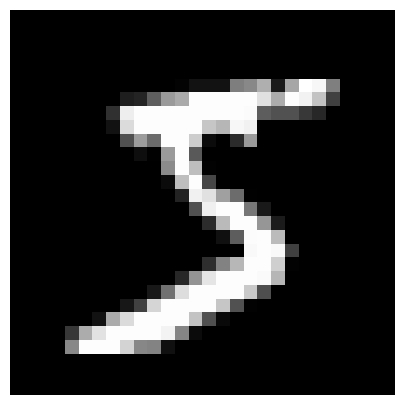

In [3]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5, 5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [4]:
# 훈련 셋과 검증 셋의 이미지 픽셀을 나타내는 값의 최솟값, 최댓값 출력
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [5]:
# 정규화(Normalization)
x_train=x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


* CNN 모델에 주입하기위해 색상 채널 추가


In [6]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in=x_train[..., tf.newaxis]
x_valid_in=x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


2-2. Sequential API로 모델 생성 및 학습
* 합성곱 레이어 1, 풀링 레이어 1을 적용하는 모델 생성

In [7]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

* 옵티마이저, 손실함수, 평가지표 설정 후 컴파일 -> 모델 인스턴스 생성
* fit(훈련, 검증, epoch=10)

In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2276 - accuracy: 0.9358 - val_loss: 0.0885 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0806 - accuracy: 0.9765 - val_loss: 0.0707 - val_accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0600 - accuracy: 0.9819 - val_loss: 0.0605 - val_accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0492 - accuracy: 0.9856 - val_loss: 0.0524 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0610 - val_accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0528 - val_accuracy: 0.9828
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0593 -

In [9]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0552 - accuracy: 0.9848


[0.05515867471694946, 0.9847999811172485]

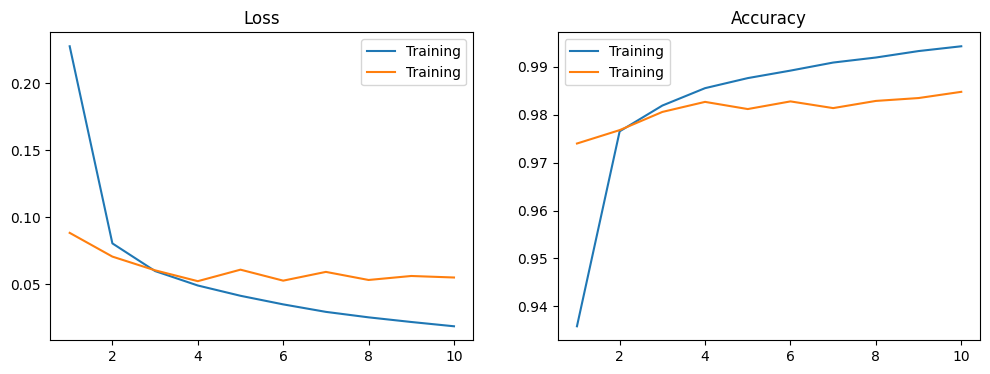

In [11]:
def plot_loss_acc(history, epoch):

  loss, val_loss = history.history["loss"], history.history["val_loss"]
  acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]

  fig, axes = plt.subplots(1, 2, figsize = (12, 4))

  axes[0].plot(range(1, epoch + 1), loss, label = "Training")
  axes[0].plot(range(1, epoch + 1), val_loss, label = "Training")
  axes[0].legend(loc = "best")
  axes[0].set_title("Loss")

  axes[1].plot(range(1, epoch + 1), acc, label = "Training")
  axes[1].plot(range(1, epoch + 1), val_acc, label = "Training")
  axes[1].legend(loc = "best")
  axes[1].set_title("Accuracy")

  plt.show()

plot_loss_acc(history, 10)

> 4 이후부터 과대적합

2-3. 모델 구조 파악
* 레이어 이름
* 출력 텐서의 형태
* 각 레이어를 구성하는 파라미터 개수
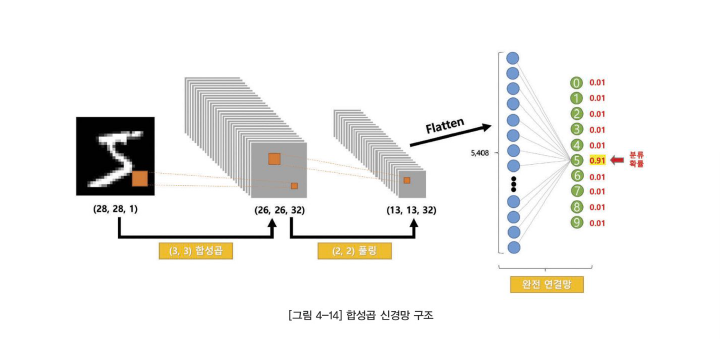

In [13]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [15]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [16]:
# 레이어
model.layers

In [17]:
# 첫 번째 레이어 선택
model.layers[0]

In [18]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [19]:
# 첫 번재 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [20]:
# 첫 번재 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 7.03087509e-01, -6.94663171e-03,  1.39307424e-01,
            2.58785039e-01, -9.69685555e-01, -3.98024380e-01,
           -1.72397494e-01,  1.92679226e-01,  7.73932710e-02,
            3.66793852e-03, -5.48284233e-01,  3.04449117e-03,
           -1.05072640e-01, -5.57028949e-01,  3.61352377e-02,
           -5.28147183e-02,  2.73617595e-01,  7.62207061e-02,
           -4.38128039e-02,  2.61503339e-01,  5.69200963e-02,
           -1.08536625e+00, -1.20776999e+00,  3.64053994e-01,
           -1.34076208e-01,  5.83264709e-01, -4.98141468e-01,
            4.10109103e-01,  2.77824253e-01, -1.26873598e-01,
            3.38935852e-01, -6.32045150e-01]],
 
         [[-8.98020193e-02,  6.05784692e-02,  4.20643002e-01,
            2.91065305e-01, -9.56364870e-01, -4.50941801e-01,
           -2.93132603e-01,  2.11082712e-01,  2.20653519e-01,
            3.08948815e-01, -3.77216130e-01,  4.84961003e-01,
           

In [21]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 7.03087509e-01, -6.94663171e-03,  1.39307424e-01,
           2.58785039e-01, -9.69685555e-01, -3.98024380e-01,
          -1.72397494e-01,  1.92679226e-01,  7.73932710e-02,
           3.66793852e-03, -5.48284233e-01,  3.04449117e-03,
          -1.05072640e-01, -5.57028949e-01,  3.61352377e-02,
          -5.28147183e-02,  2.73617595e-01,  7.62207061e-02,
          -4.38128039e-02,  2.61503339e-01,  5.69200963e-02,
          -1.08536625e+00, -1.20776999e+00,  3.64053994e-01,
          -1.34076208e-01,  5.83264709e-01, -4.98141468e-01,
           4.10109103e-01,  2.77824253e-01, -1.26873598e-01,
           3.38935852e-01, -6.32045150e-01]],

        [[-8.98020193e-02,  6.05784692e-02,  4.20643002e-01,
           2.91065305e-01, -9.56364870e-01, -4.50941801e-01,
          -2.93132603e-01,  2.11082712e-01,  2.20653519e-01,
           3.08948815e-01, -3.77216130e-01,  4.84961003e-01,
           5.66365123e-01,  

In [22]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00949092, -0.24435663, -0.27056897, -0.35678604,  0.10478812,
       -0.02130699, -0.21367425, -0.35263565, -0.04394544, -0.14149909,
       -0.12256247, -0.00944871, -0.29860798, -0.19755201, -0.02122619,
       -0.12019824, -0.33709326, -0.24487294, -0.02369268, -0.261498  ,
       -0.03275943,  0.02142456, -0.0681494 , -0.34444544, -0.33325112,
        0.14239267, -0.25708693, -0.39881316, -0.49823034, -0.05576778,
       -0.05637027, -0.4129641 ], dtype=float32)>

In [24]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

In [25]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator=tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 91ms/step


2

In [26]:
# 첫 번재 레이어 conv의 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

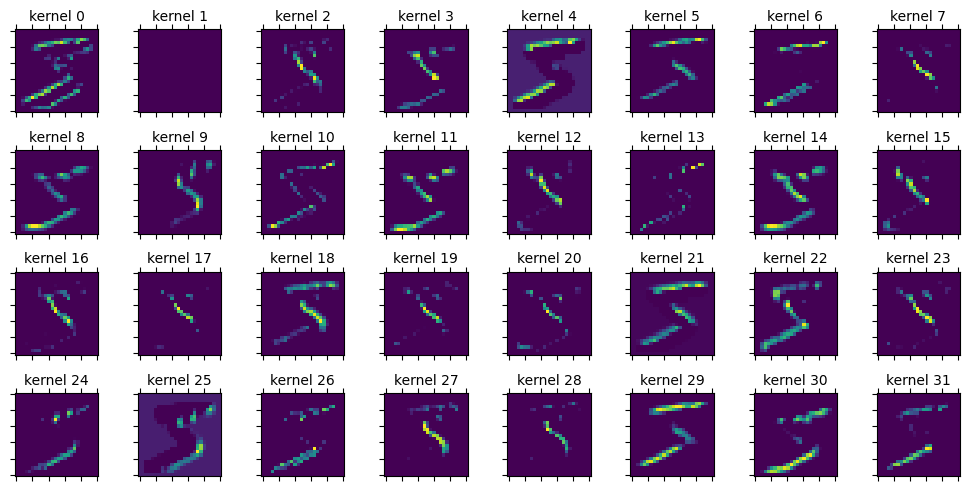

In [27]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [28]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


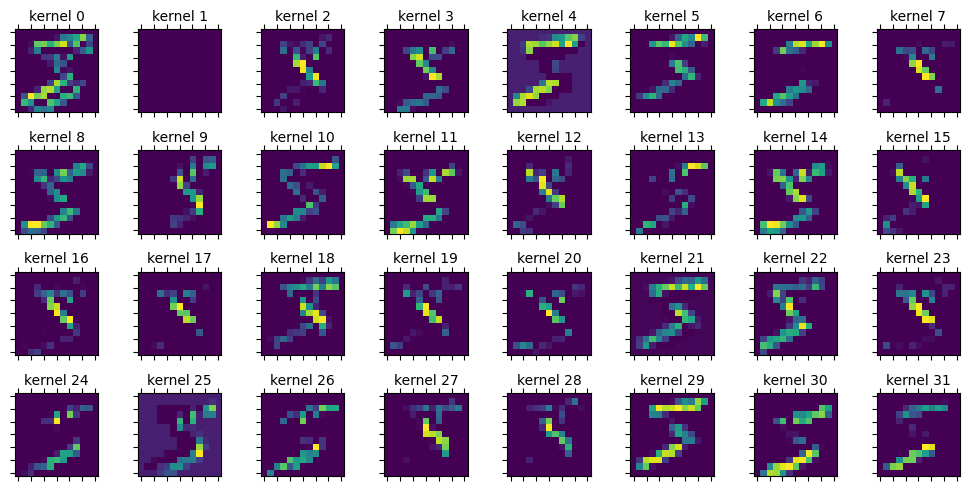

In [29]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

#03. 복잡한 모델 생성
* Functional API 사용하면 Sequential로 구현 못하는 복잡한 구조의 모델 정의 가능

3-1. 데이터셋 준비

In [30]:
import tensorflow as tf
import numpy as np

#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [31]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [32]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [33]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [34]:
# 입력 이미지 데이터를 255로 나눠서 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


3-2. Functional API로 다중 입력, 다중 출력 레이어 생성

In [35]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

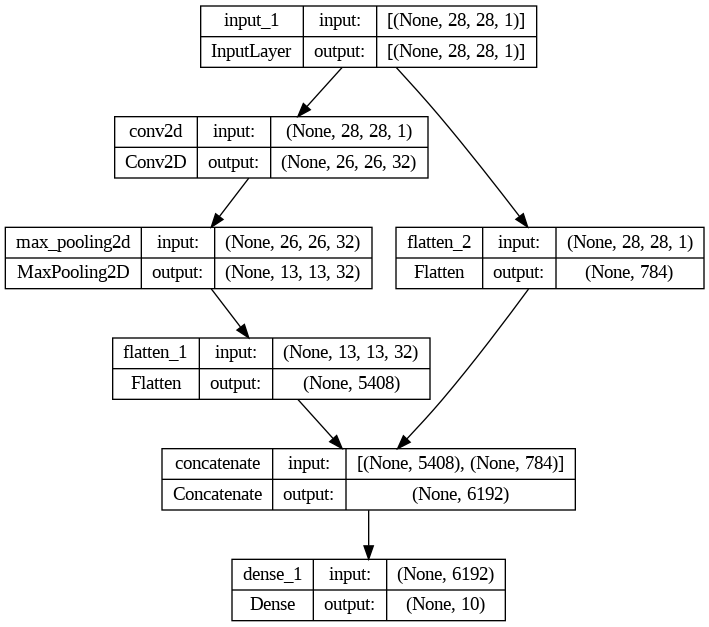

In [36]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')


In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2158 - accuracy: 0.9385 - val_loss: 0.0878 - val_accuracy: 0.9742
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0785 - accuracy: 0.9772 - val_loss: 0.0617 - val_accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0599 - accuracy: 0.9822 - val_loss: 0.0552 - val_accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0552 - val_accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0591 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0549 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0555 -

3-3. 다중 출력 분류 모델
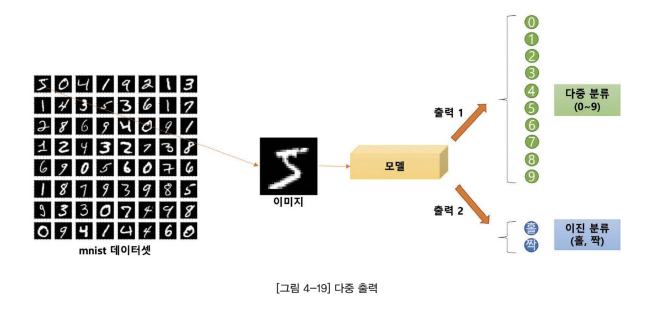

In [38]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input) #1
print(model.output) #10

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


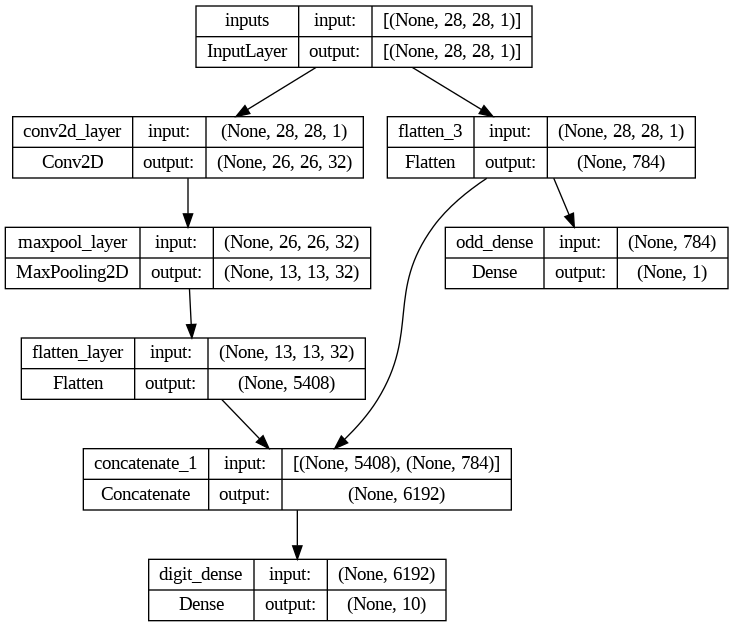

In [40]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')


In [41]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.3703 - digit_dense_loss: 0.2080 - odd_dense_loss: 0.3245 - digit_dense_accuracy: 0.9404 - odd_dense_accuracy: 0.8646 - val_loss: 0.2309 - val_digit_dense_loss: 0.0919 - val_odd_dense_loss: 0.2779 - val_digit_dense_accuracy: 0.9729 - val_odd_dense_accuracy: 0.8894
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2169 - digit_dense_loss: 0.0808 - odd_dense_loss: 0.2722 - digit_dense_accuracy: 0.9758 - odd_dense_accuracy: 0.8914 - val_loss: 0.1978 - val_digit_dense_loss: 0.0662 - val_odd_dense_loss: 0.2632 - val_digit_dense_accuracy: 0.9776 - val_odd_dense_accuracy: 0.8975
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1928 - digit_dense_loss: 0.0613 - odd_dense_loss: 0.2630 - digit_dense_accuracy: 0.9822 - odd_dense_accuracy: 0.8964 - val_loss: 0.1961 - val_digit_dense_loss: 0.0662 - val_odd_dense_loss: 0.2598 - val_digit_dense_accuracy: 0.9787 -

[0.18752625584602356,
 0.05921119824051857,
 0.2566300332546234,
 0.9840999841690063,
 0.9017999768257141]

In [42]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 2s 7ms/step - loss: 0.1875 - digit_dense_loss: 0.0592 - odd_dense_loss: 0.2566 - digit_dense_accuracy: 0.9841 - odd_dense_accuracy: 0.9018


[0.18752625584602356,
 0.05921119824051857,
 0.2566300332546234,
 0.9840999841690063,
 0.9017999768257141]

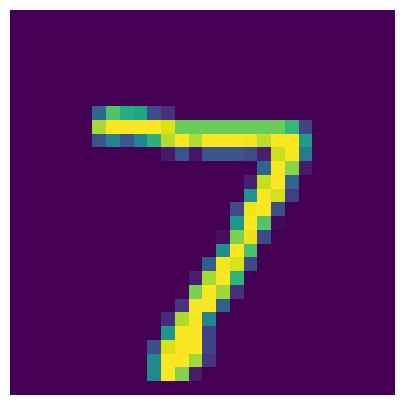

In [43]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [44]:
# 숫자 7 이미지에 대한 예측 확률
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 6s 18ms/step
[7.8934736e-14 1.6434385e-09 1.4219391e-08 2.2989645e-06 5.4737178e-12
 2.3737947e-12 7.1065947e-22 9.9999768e-01 6.4269927e-09 7.4331217e-09]
[0.9994642]


In [45]:
# 예측 확률을 실제 정답 레이블로 변환
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [46]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-46-b68f671b10f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

3-4. 전이 학습
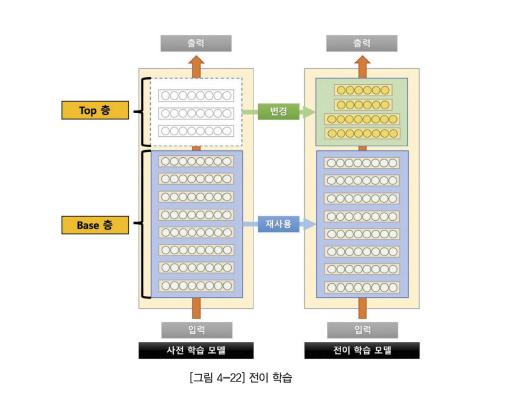

In [47]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


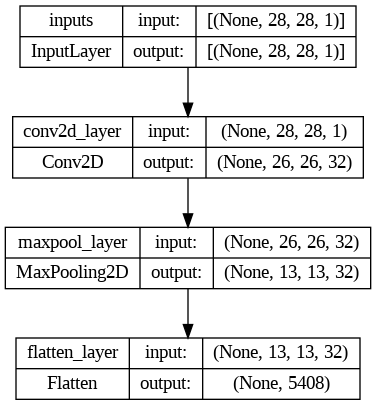

In [48]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')


In [49]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


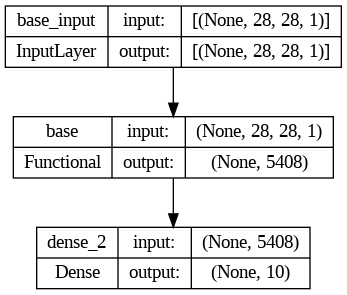

In [50]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [51]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1314 - accuracy: 0.9632 - val_loss: 0.0711 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0565 - val_accuracy: 0.9805
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0536 - val_accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0573 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0546 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.0536 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.0574 -

In [52]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [53]:
# Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

모델 전체가 아닌 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정

In [54]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [55]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [56]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1177 - accuracy: 0.9685 - val_loss: 0.0552 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0495 - accuracy: 0.9851 - val_loss: 0.0562 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0367 - accuracy: 0.9891 - val_loss: 0.0489 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0546 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0550 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0554 - val_accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0.0559 - val_